In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats

In [ ]:
df = pd.read_csv('/Users/rounaksinghbuttar/Desktop/Rounak/C++ Placement Course/Projects/MTech final year project/Supermart Grocery Sales - Retail Analytics Dataset.csv')


In [ ]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [ ]:
df.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [ ]:
df['Category'].unique()

array(['Oil & Masala', 'Beverages', 'Food Grains', 'Fruits & Veggies',
       'Bakery', 'Snacks', 'Eggs, Meat & Fish'], dtype=object)

In [ ]:
x = np.array(df['Category'])

In [ ]:
x

array(['Oil & Masala', 'Beverages', 'Food Grains', ..., 'Food Grains',
       'Oil & Masala', 'Food Grains'], dtype=object)

In [ ]:
x.shape

(9994,)

In [ ]:
y = np.array(df['Sales'])

<BarContainer object of 9994 artists>

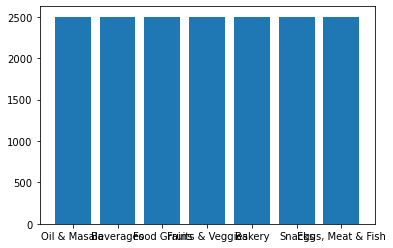

In [ ]:
plt.bar(x,y)

In [ ]:
x.shape

(9994,)

In [ ]:
y.shape

(9994,)

In [ ]:
pd.DataFrame([x,y])

,0,1,2,3,4,5,6,7,8,9,...,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993
0,Oil & Masala,Beverages,Food Grains,Fruits & Veggies,Food Grains,Food Grains,Fruits & Veggies,Fruits & Veggies,Bakery,Bakery,...,Oil & Masala,"Eggs, Meat & Fish",Bakery,Fruits & Veggies,Snacks,"Eggs, Meat & Fish",Bakery,Food Grains,Oil & Masala,Food Grains
1,1254,749,2360,896,2355,2305,826,1847,791,1795,...,727,1286,2199,1350,1460,945,1195,1567,1659,1034


In [ ]:
x1 = x.reshape(9994,1)
y1 = y.reshape(9994,1)

In [ ]:
x1.shape

(9994, 1)

In [ ]:
df1 = pd.DataFrame([x,y]).T

In [ ]:
items = df['Category'].unique()

In [ ]:
items = np.array(items)

In [ ]:
type(items)

numpy.ndarray

In [ ]:
df1

,0,1
0,Oil & Masala,1254
1,Beverages,749
2,Food Grains,2360
3,Fruits & Veggies,896
4,Food Grains,2355
...,...,...
9989,"Eggs, Meat & Fish",945
9990,Bakery,1195
9991,Food Grains,1567
9992,Oil & Masala,1659


In [ ]:
df1.columns = ['Category', 'Sales']

In [ ]:
df1.head()

,Category,Sales
0,Oil & Masala,1254
1,Beverages,749
2,Food Grains,2360
3,Fruits & Veggies,896
4,Food Grains,2355


In [ ]:
df1.groupby('Category')

In [ ]:
df1

,Category,Sales
0,Oil & Masala,1254
1,Beverages,749
2,Food Grains,2360
3,Fruits & Veggies,896
4,Food Grains,2355
...,...,...
9989,"Eggs, Meat & Fish",945
9990,Bakery,1195
9991,Food Grains,1567
9992,Oil & Masala,1659


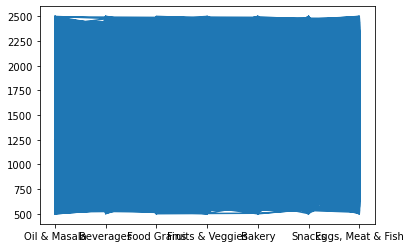

In [ ]:
plt.plot(x,y)

# check this out

In [ ]:
df1_plot = df1.groupby(['Category']).sum()

In [ ]:
df1_plot.reset_index(inplace = True)

<BarContainer object of 7 artists>

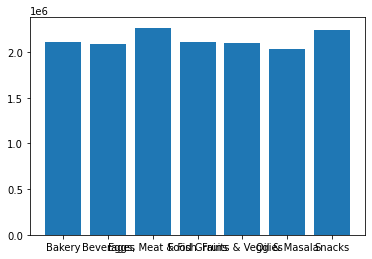

In [ ]:
plt.bar(df1_plot['Category'], df1_plot['Sales'])

<BarContainer object of 7 artists>

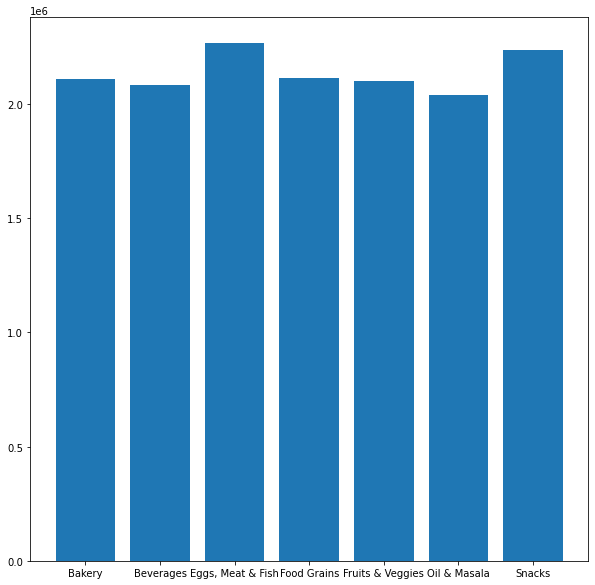

In [ ]:
plt.figure(figsize=(10, 10))
display(plt.bar(df1_plot['Category'], df1_plot['Sales']))

<AxesSubplot:xlabel='Category', ylabel='Sales'>

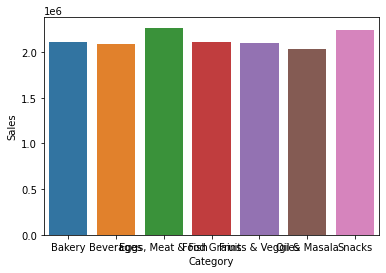

In [ ]:
sn.barplot(x = 'Category', y = 'Sales', data = df1_plot)

(array([1027.,  997.,  975.,  985., 1018., 1042.,  985.,  984.,  968.,
        1013.]),
 array([500.0, 700.0, 900.0, 1100.0, 1300.0, 1500.0, 1700.0, 1900.0,
        2100.0, 2300.0, 2500.0], dtype=object),
 <BarContainer object of 10 artists>)

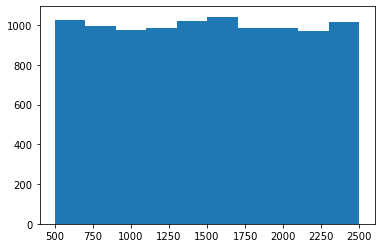

In [ ]:
plt.hist(df1['Sales'])

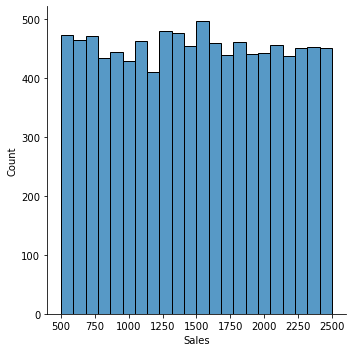

In [ ]:
sn.displot(df1['Sales'])

# A box plot is used to find out outliers and variability of data

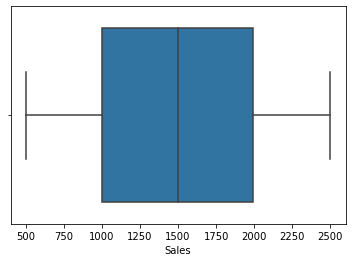

In [ ]:
box = sn.boxplot(x = df1['Sales'])

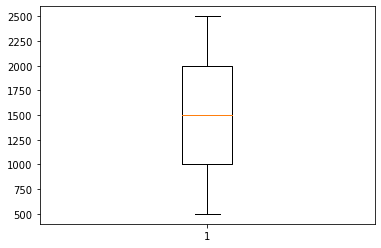

In [ ]:
box = plt.boxplot(df1['Sales'])

In [ ]:
[item.get_ydata()[0] for item in box['caps']]

[500, 2500]

In [ ]:
[item.get_ydata()[0] for item in box['whiskers']] # 25 and 75 quartiles so IQR is 994.75

[1000.0, 1994.75]

In [ ]:
[item.get_ydata()[0] for item in box['medians']]

[1498.0]

<AxesSubplot:xlabel='Category', ylabel='Sales'>

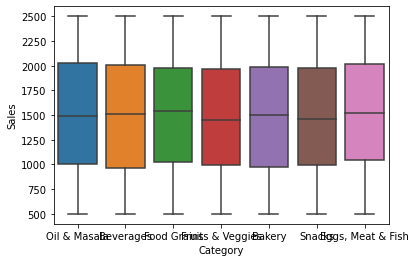

In [ ]:
sn.boxplot(x = 'Category', y = 'Sales', data = df1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Customer Name  9994 non-null   object        
 2   Category       9994 non-null   object        
 3   Sub Category   9994 non-null   object        
 4   City           9994 non-null   object        
 5   Order Date     9994 non-null   datetime64[ns]
 6   Region         9994 non-null   object        
 7   Sales          9994 non-null   int64         
 8   Discount       9994 non-null   float64       
 9   Profit         9994 non-null   float64       
 10  State          9994 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 859.0+ KB


In [ ]:
df2 = df[['Category', 'Sub Category', 'City', 'Discount', 'Profit', 'Sales']].groupby('Sub Category').sum()

In [ ]:
df2.reset_index(inplace = True)

In [ ]:
df2.head()

,Sub Category,Discount,Profit,Sales
0,Atta & Flour,80.44,127861.10,534649
1,Biscuits,103.29,169357.62,684083
2,Breads & Buns,113.70,190764.98,742586
3,Cakes,101.54,168398.46,685612
4,Chicken,79.66,124049.89,520497


<AxesSubplot:xlabel='Sub Category', ylabel='Sales'>

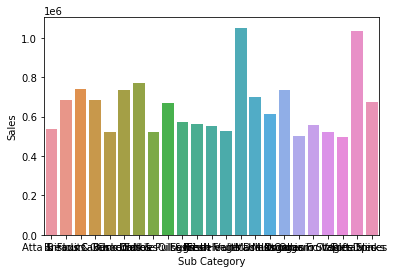

In [ ]:
sn.barplot(x = 'Sub Category', y = 'Sales', data = df2)

(array([8., 3., 1., 5., 4., 0., 0., 0., 0., 2.]),
 array([ 498323. ,  553634.6,  608946.2,  664257.8,  719569.4,  774881. ,
         830192.6,  885504.2,  940815.8,  996127.4, 1051439. ]),
 <BarContainer object of 10 artists>)

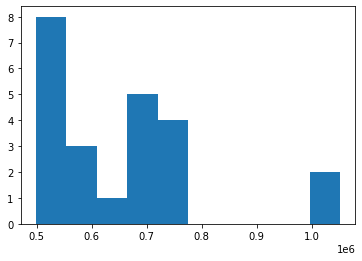

In [ ]:
plt.hist(df2['Sales'])

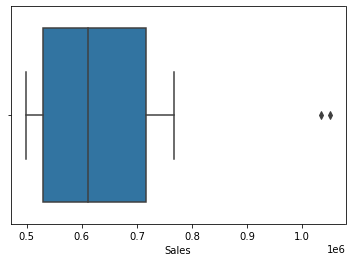

In [ ]:
box = sn.boxplot(x = df2['Sales'])

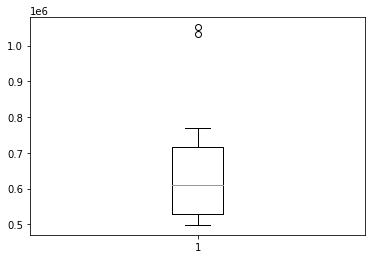

In [ ]:
box = plt.boxplot(df2['Sales'])

# we can see that there are outliers

In [ ]:
[item.get_ydata()[0] for item in box['caps']] # lowest and highest

[498323, 768213]

In [ ]:
[item.get_ydata()[0] for item in box['whiskers']] # 25 and 75 quartile

[530245.5, 715689.0]

In [ ]:
[item.get_ydata()[0] for item in box['medians']] # median

[611200.0]

In [ ]:
df2[df2['Sales'] > 768213][['Sub Category', 'Sales']]

,Sub Category,Sales
13,Health Drinks,1051439
21,Soft Drinks,1033874


# we have found out what are those outliers

In [ ]:
df2.head()

,Sub Category,Discount,Profit,Sales
0,Atta & Flour,80.44,127861.10,534649
1,Biscuits,103.29,169357.62,684083
2,Breads & Buns,113.70,190764.98,742586
3,Cakes,101.54,168398.46,685612
4,Chicken,79.66,124049.89,520497


In [ ]:
df2['P/S'] = round(df2['Profit']/df2['Sales'] * 100,2)

In [ ]:
df2.head()

,Sub Category,Discount,Profit,Sales,P/S
0,Atta & Flour,80.44,127861.10,534649,23.91
1,Biscuits,103.29,169357.62,684083,24.76
2,Breads & Buns,113.70,190764.98,742586,25.69
3,Cakes,101.54,168398.46,685612,24.56
4,Chicken,79.66,124049.89,520497,23.83


<AxesSubplot:xlabel='Sub Category', ylabel='P/S'>

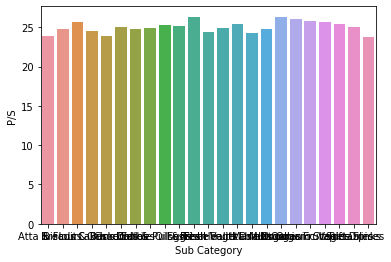

In [ ]:
sn.barplot(x = 'Sub Category', y = 'P/S', data = df2)

# we see that profit margin is similar for all products

<AxesSubplot:xlabel='Sub Category', ylabel='Profit'>

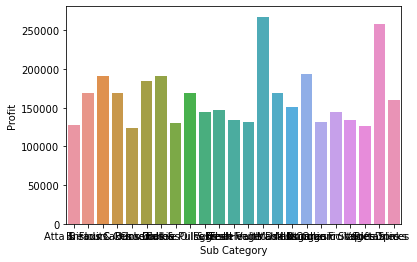

In [ ]:
sn.barplot(x = 'Sub Category', y = 'Profit', data = df2)

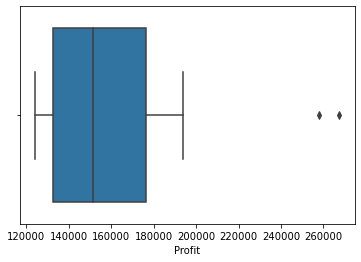

In [ ]:
box = sn.boxplot(x = df2['Profit'])

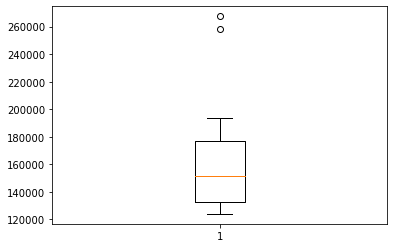

In [ ]:
box = plt.boxplot(df2['Profit'])

In [ ]:
[item.get_ydata()[0] for item in box['caps']] # lowest and highest

[124049.89, 193685.81]

In [ ]:
df2[df2['Profit'] > 193685.81][['Sub Category', 'Profit']]

,Sub Category,Profit
13,Health Drinks,267469.79
21,Soft Drinks,258135.97


In [ ]:
df2['Profit'].nlargest(n=10)

13    267469.79
21    258135.97
16    193685.81
2     190764.98
6     190643.70
5     183849.34
1     169357.62
14    168999.11
8     168593.58
3     168398.46
Name: Profit, dtype: float64

In [ ]:
df2[df2['Profit'] > 168398]

,Sub Category,Discount,Profit,Sales,P/S
1,Biscuits,103.29,169357.62,684083,24.76
2,Breads & Buns,113.70,190764.98,742586,25.69
3,Cakes,101.54,168398.46,685612,24.56
5,Chocolates,112.60,183849.34,733898,25.05
6,Cookies,113.72,190643.70,768213,24.82
8,Edible Oil & Ghee,103.51,168593.58,668086,25.24
13,Health Drinks,166.49,267469.79,1051439,25.44
14,Masalas,103.65,168999.11,697480,24.23
16,Noodles,109.86,193685.81,735435,26.34
21,Soft Drinks,155.97,258135.97,1033874,24.97


In [ ]:
def get_sub(df2):
    lst = []
    for i in df2['Sub Category']:
        lst.append(i)
    return lst

In [ ]:
tt = df2[df2['Profit'] > 168398]

In [ ]:
get_sub(tt)

['Biscuits',
 'Breads & Buns',
 'Cakes',
 'Chocolates',
 'Cookies',
 'Edible Oil & Ghee',
 'Health Drinks',
 'Masalas',
 'Noodles',
 'Soft Drinks']

[Text(0, 0, 'Biscuits'),
 Text(1, 0, 'Breads & Buns'),
 Text(2, 0, 'Cakes'),
 Text(3, 0, 'Chocolates'),
 Text(4, 0, 'Cookies'),
 Text(5, 0, 'Edible Oil & Ghee'),
 Text(6, 0, 'Health Drinks'),
 Text(7, 0, 'Masalas'),
 Text(8, 0, 'Noodles'),
 Text(9, 0, 'Soft Drinks')]

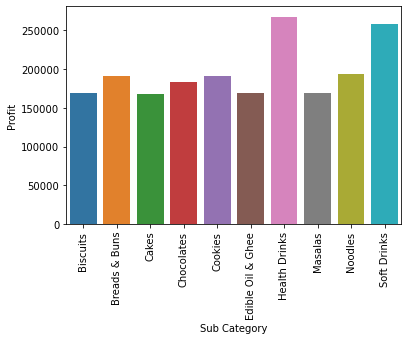

In [ ]:
plot = sn.barplot(x = 'Sub Category', y = 'Profit', data = df2[df2['Profit'] > 168398])

plot.set_xticklabels(labels = get_sub(tt), rotation = 90)

In [ ]:
df2['Discount'].nlargest(n=10)

13    166.49
21    155.97
6     113.72
2     113.70
5     112.60
16    109.86
14    103.65
8     103.51
1     103.29
3     101.54
Name: Discount, dtype: float64

In [ ]:
df2[df2['Discount'] > 155]

,Sub Category,Discount,Profit,Sales,P/S
13,Health Drinks,166.49,267469.79,1051439,25.44
21,Soft Drinks,155.97,258135.97,1033874,24.97


# most profitable item has been given the highest discount

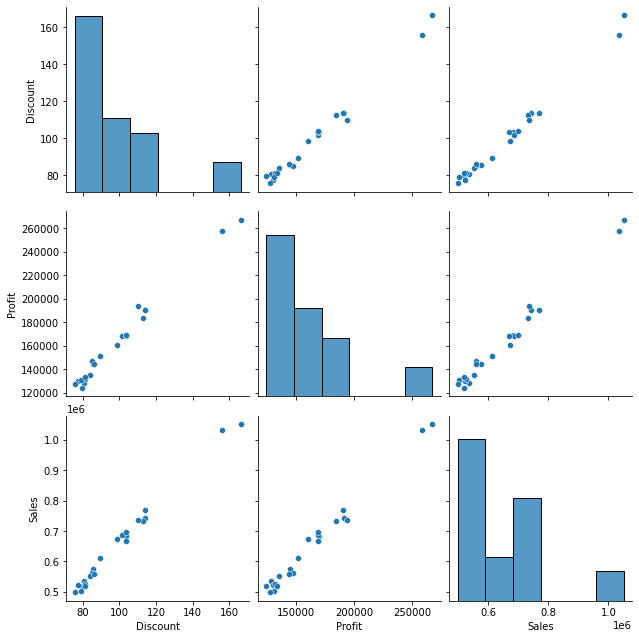

In [ ]:
features = ['Discount', 'Profit', 'Sales']
sn.pairplot(df2[features], height = 3)

<AxesSubplot:>

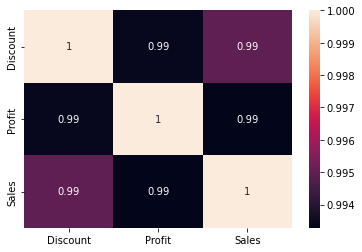

In [ ]:
sn.heatmap(df2[features].corr(), annot = True)

# Z - Test

## Values required for Z-test
### mu - population mean
### sd - population standard deviation
### X - sample mean
### n - sample size

## formula

### Z = (X-mu)/(sd/sqrt(n))

In [ ]:
soft_drinks_df = df[df['Sub Category'] == 'Soft Drinks']

In [ ]:
soft_drinks_df = soft_drinks_df[['City','Order Date','Sales', 'Discount', 'Profit']]

In [ ]:
df['City'].unique()

array(['Vellore', 'Krishnagiri', 'Perambalur', 'Dharmapuri', 'Ooty',
       'Trichy', 'Ramanadhapuram', 'Tirunelveli', 'Chennai', 'Karur',
       'Namakkal', 'Dindigul', 'Kanyakumari', 'Bodi', 'Tenkasi',
       'Viluppuram', 'Madurai', 'Salem', 'Cumbum', 'Nagercoil',
       'Pudukottai', 'Theni', 'Coimbatore', 'Virudhunagar'], dtype=object)

In [ ]:
soft_drinks_df.sort_values('Order Date')

,City,Order Date,Sales,Discount,Profit
5438,Namakkal,2015-01-20,1393,0.30,431.83
1717,Theni,2015-01-20,603,0.28,168.84
3231,Ooty,2015-01-20,1785,0.29,624.75
4110,Ooty,2015-01-20,1768,0.13,353.60
6237,Madurai,2015-01-26,666,0.29,133.20
...,...,...,...,...,...
3438,Tirunelveli,2018-12-25,548,0.30,65.76
7767,Ramanadhapuram,2018-12-25,702,0.30,49.14
7963,Namakkal,2018-12-27,2233,0.19,870.87
2859,Chennai,2018-12-29,988,0.32,355.68


In [ ]:
soft_drinks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 681 entries, 19 to 9945
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        681 non-null    object        
 1   Order Date  681 non-null    datetime64[ns]
 2   Sales       681 non-null    int64         
 3   Discount    681 non-null    float64       
 4   Profit      681 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 31.9+ KB


### the underlying distribution of profit column

(array([ 91., 142., 119., 104.,  72.,  67.,  39.,  19.,  17.,  11.]),
 array([  25.25 ,  132.255,  239.26 ,  346.265,  453.27 ,  560.275,
         667.28 ,  774.285,  881.29 ,  988.295, 1095.3  ]),
 <BarContainer object of 10 artists>)

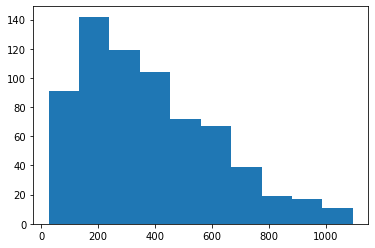

In [ ]:
plt.hist(soft_drinks_df['Profit'])

In [ ]:
population_mean = soft_drinks_df['Profit'].mean()

In [ ]:
sample = soft_drinks_df['Profit'].sample(n=30)

In [ ]:
sample_mean = sample.mean()

In [ ]:
population_mean

379.05428781204097

In [ ]:
pop_sd = soft_drinks_df['Profit'].std() # population sd

In [ ]:
def z_test(population_mean, sample_mean, pop_sd, sample_size):
    z_score = (sample_mean - population_mean)/(pop_sd/np.sqrt(sample_size))
    return z_score, stats.norm.cdf(z_score)

In [ ]:
# z test

# H0: mu = 379
# Ha: mu != 379

ans = z_test(population_mean, sample_mean, pop_sd, 30)
print('z_score = ', ans[0], ' p value = ', ans[1])

z_score =  0.2576232193394829  p value =  0.6016511459952777


### since the z score is less than significance limit, we fail to reject the null hypothesis

In [ ]:
# Z test

# H0: mu = 200   // our null hypothesis is that the average profit of soft drinks is 200 rupees.
# Ha: mu != 200  // our alternative hypothesis is that the average profit of soft drinks is not 200 rupees.

# alpha = 0.05
# confidence level is 95% so the critical value is 1.96



ans = z_test(200, sample_mean, pop_sd, 30)
print('z_score = ', ans[0], ' p value = ', ans[1])

z_score =  4.415578220889051  p value =  0.99999496298287


### we see that z score is more than the significance level. i.e. 4.16 > 1.96.
### so we reject the null hypothesis

# t - Test

In [ ]:
sample = soft_drinks_df['Profit'].sample(n=30)

In [ ]:
sample_mean = sample.mean()

In [ ]:
sample_sd = sample.std()

In [ ]:
# t test for 90% confidence and sample size = 30

def t_test(sample_mean, sample_sd, sample_size):
    ll = sample_mean - 1.699*(sample_sd/np.sqrt(sample_size))
    ul = sample_mean + 1.699*(sample_sd/np.sqrt(sample_size))
    return ll, ul

In [ ]:
ans = t_test(sample_mean, sample_sd, 30)
print('at 90% confidence interval\n',ans[0],' <= mu <= ',ans[1])

at 90% confidence interval
 322.8975535098786  <= mu <=  454.29244649012145


In [ ]:
soft_drinks_df['Profit'].mean()

379.05428781204097

### so, we have confirmed that the population mean lies between the found out values

In [ ]:
soft_drinks_df

,City,Order Date,Sales,Discount,Profit
19,Kanyakumari,2015-08-27,692,0.29,159.16
22,Krishnagiri,2017-12-09,707,0.34,148.47
28,Krishnagiri,2016-09-17,1988,0.22,874.72
30,Dharmapuri,2016-09-17,1845,0.24,166.05
36,Salem,2017-12-08,934,0.35,56.04
...,...,...,...,...,...
9928,Karur,2018-07-31,1688,0.18,185.68
9933,Dindigul,2017-09-26,1316,0.18,78.96
9940,Kanyakumari,2015-03-18,2379,0.23,428.22
9942,Kanyakumari,2018-05-07,2088,0.32,668.16


In [ ]:
index_col = np.arange(681).reshape(681,1)

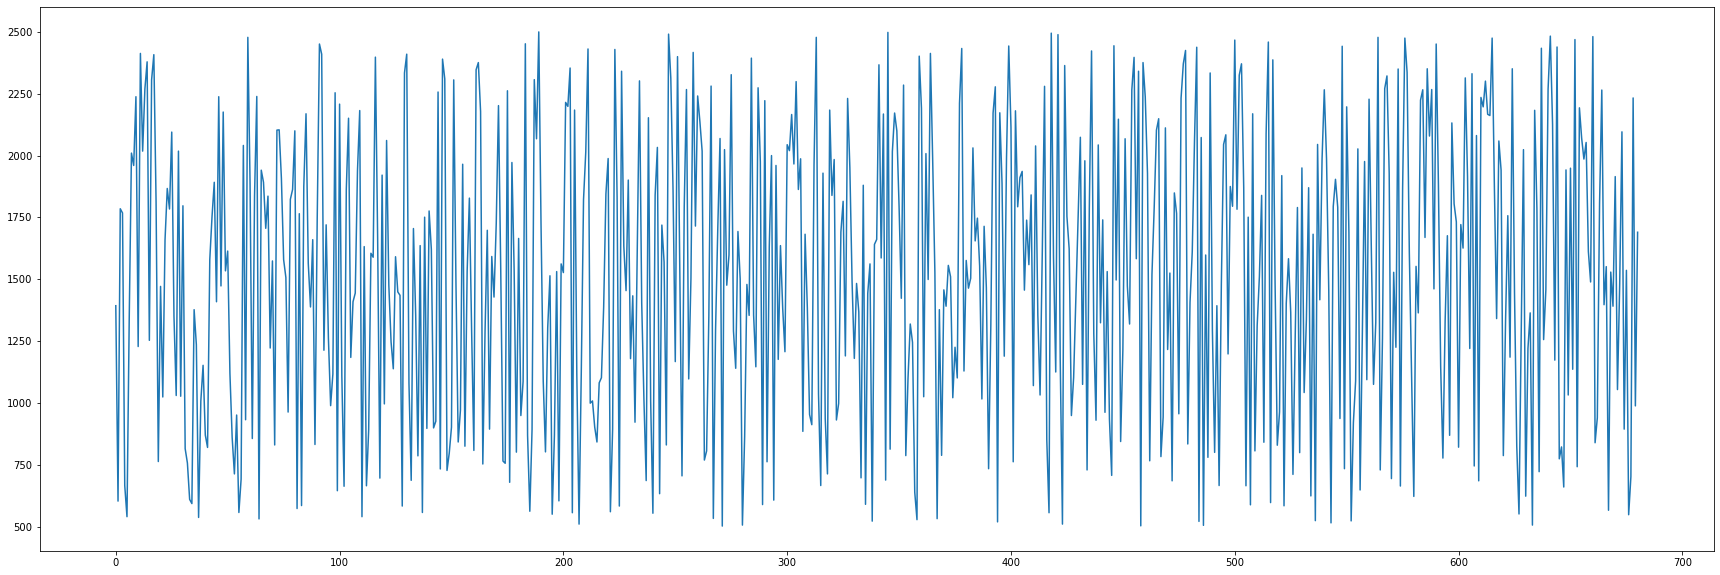

In [ ]:
# soft_drinks_df = soft_drinks_df.drop('index_col', axis = 1)
soft_drinks_df = soft_drinks_df.sort_values('Order Date')
soft_drinks_df['index_col'] = index_col
plt.figure(figsize=(30, 10))
plt.plot(soft_drinks_df['index_col'], soft_drinks_df['Sales'])

In [ ]:
soft_drinks_df['City'].unique()

array(['Namakkal', 'Theni', 'Ooty', 'Madurai', 'Dharmapuri', 'Trichy',
       'Krishnagiri', 'Pudukottai', 'Perambalur', 'Kanyakumari',
       'Tenkasi', 'Salem', 'Dindigul', 'Chennai', 'Tirunelveli', 'Bodi',
       'Nagercoil', 'Cumbum', 'Ramanadhapuram', 'Karur', 'Vellore',
       'Viluppuram', 'Virudhunagar', 'Coimbatore'], dtype=object)

In [ ]:
soft_drinks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 681 entries, 5438 to 4696
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        681 non-null    object        
 1   Order Date  681 non-null    datetime64[ns]
 2   Sales       681 non-null    int64         
 3   Discount    681 non-null    float64       
 4   Profit      681 non-null    float64       
 5   index_col   681 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 37.2+ KB


In [ ]:
soft_drinks_df['Order Date'] = pd.to_datetime(soft_drinks_df['Order Date']) - pd.to_timedelta(7, unit='d')

In [ ]:
soft_drinks_df

,City,Order Date,Sales,Discount,Profit,index_col
5438,Namakkal,2015-01-13,1393,0.30,431.83,0
1717,Theni,2015-01-13,603,0.28,168.84,1
3231,Ooty,2015-01-13,1785,0.29,624.75,2
4110,Ooty,2015-01-13,1768,0.13,353.60,3
6237,Madurai,2015-01-19,666,0.29,133.20,4
...,...,...,...,...,...,...
3438,Tirunelveli,2018-12-18,548,0.30,65.76,676
7767,Ramanadhapuram,2018-12-18,702,0.30,49.14,677
7963,Namakkal,2018-12-20,2233,0.19,870.87,678
2859,Chennai,2018-12-22,988,0.32,355.68,679


In [ ]:
soft_drinks_df.groupby([pd.Grouper(key='Order Date', freq='W')])['Sales'].sum()

Order Date
2015-01-18     5549
2015-01-25     2544
2015-02-01        0
2015-02-08     2010
2015-02-15        0
              ...  
2018-11-25    12917
2018-12-02    15750
2018-12-09     9728
2018-12-16     9487
2018-12-23    10687
Freq: W-SUN, Name: Sales, Length: 206, dtype: int64

In [ ]:
soft_drinks_df

,City,Order Date,Sales,Discount,Profit,index_col
5438,Namakkal,2015-01-13,1393,0.30,431.83,0
1717,Theni,2015-01-13,603,0.28,168.84,1
3231,Ooty,2015-01-13,1785,0.29,624.75,2
4110,Ooty,2015-01-13,1768,0.13,353.60,3
6237,Madurai,2015-01-19,666,0.29,133.20,4
...,...,...,...,...,...,...
3438,Tirunelveli,2018-12-18,548,0.30,65.76,676
7767,Ramanadhapuram,2018-12-18,702,0.30,49.14,677
7963,Namakkal,2018-12-20,2233,0.19,870.87,678
2859,Chennai,2018-12-22,988,0.32,355.68,679


In [ ]:
soft_drinks_df.isnull().sum()

City          0
Order Date    0
Sales         0
Discount      0
Profit        0
index_col     0
dtype: int64

In [ ]:
soft_drinks_df['Order Date'].dt.isocalendar().week

5438     3
1717     3
3231     3
4110     3
6237     4
        ..
3438    51
7767    51
7963    51
2859    51
4696    51
Name: week, Length: 681, dtype: UInt32

In [ ]:
soft_drinks_df['Week'] = soft_drinks_df['Order Date'].dt.isocalendar().week

In [ ]:
soft_drinks_df

,City,Order Date,Sales,Discount,Profit,index_col,Week
5438,Namakkal,2015-01-13,1393,0.30,431.83,0,3
1717,Theni,2015-01-13,603,0.28,168.84,1,3
3231,Ooty,2015-01-13,1785,0.29,624.75,2,3
4110,Ooty,2015-01-13,1768,0.13,353.60,3,3
6237,Madurai,2015-01-19,666,0.29,133.20,4,4
...,...,...,...,...,...,...,...
3438,Tirunelveli,2018-12-18,548,0.30,65.76,676,51
7767,Ramanadhapuram,2018-12-18,702,0.30,49.14,677,51
7963,Namakkal,2018-12-20,2233,0.19,870.87,678,51
2859,Chennai,2018-12-22,988,0.32,355.68,679,51


In [ ]:
soft_drinks_df = soft_drinks_df.groupby('Week')[['Sales','Discount','Profit']].sum()

In [ ]:
soft_drinks_df

,Sales,Discount,Profit
Week,,,
1,7100,0.96,1628.66
2,7552,0.98,1602.53
3,15858,2.22,4138.33
4,17195,2.83,3468.02
5,5648,0.91,1268.50
6,10411,1.60,2910.34
7,6543,0.98,2108.13
8,14085,1.68,3567.16
9,17849,2.57,4967.65


In [ ]:
idx = np.arange(1,54).reshape(53,1)
soft_drinks_df['idx'] = idx
soft_drinks_df

,Sales,Discount,Profit,idx
Week,,,,
1,7100,0.96,1628.66,1
2,7552,0.98,1602.53,2
3,15858,2.22,4138.33,3
4,17195,2.83,3468.02,4
5,5648,0.91,1268.50,5
6,10411,1.60,2910.34,6
7,6543,0.98,2108.13,7
8,14085,1.68,3567.16,8
9,17849,2.57,4967.65,9


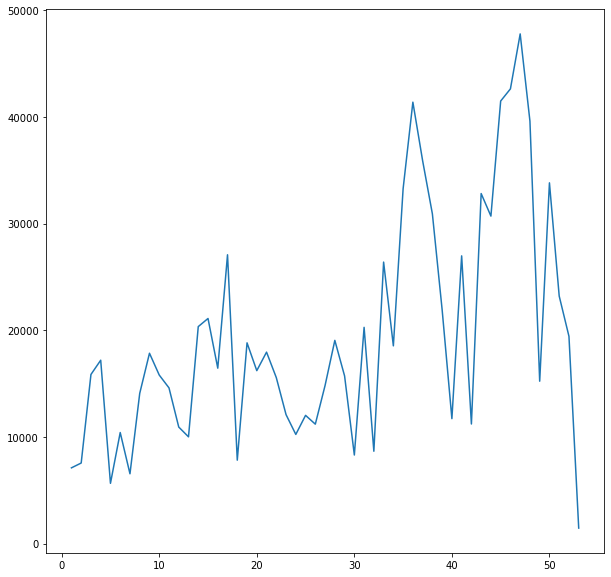

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(soft_drinks_df['idx'], soft_drinks_df['Sales'])